## Libraries Import

In [116]:
%matplotlib inline

In [117]:
#format the book
import book_format
book_format.set_style()

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math
import tqdm

In [119]:
from filterpy.discrete_bayes import update
from filterpy.discrete_bayes import normalize
import kf_book.book_plots as book_plots
from kf_book.book_plots import figsize, set_figsize

# Bayesian filtering methods in the filterpy library
from filterpy.discrete_bayes import update
from filterpy.discrete_bayes import predict

from ipywidgets import interact, IntSlider

In [120]:
import kf_book.gh_internal as gh
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars

## Data Preprocessing and Setup

In [121]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [122]:
precision = 1
exponent = 10 ** precision

def discretize(weights, outlier = False, trunc = False):
    mean = stats.mean(weights)
    stdev = stats.stdev(weights)
    print(mean-2*stdev)
    print(mean+2*stdev)
    for i in range(len(weights)):
        w = weights[i]
        if w < mean - 2*stdev and outlier == True:
            w = mean - 2*stdev
        elif w > mean + 2*stdev and outlier == True:
            w = mean + 2*stdev
        if trunc == True:
            weights[i] = truncate(w, precision)
        else:
            weights[i] = w
    return weights

In [123]:
def max_min(weights):
    max = -1*1e9
    min = 1e9
    for w in weights:
        if max < w:
            max = w
        if min > w:
            min = w
    return (max, min)

In [124]:
def list_normalize(lst):
    sum = 0
    for item in lst:
        sum = sum + item
#     print(sum)
    for i in range(len(lst)):
        lst[i] = lst[i] / sum
#         print(lst[i])
    return lst

In [125]:
# This is the measured data got from sensors
weights = [125.554959300345,122.352543611621,122.982746671183,123.484742593084,124.654669713604,
           122.003588079959,125.030426005965,124.845205492445,128.903017799339,123.838404155045,123.677761180466,
           124.811802862571,126.996273188094,123.582371177679,126.075095103288,126.427942271986,123.458430519194,
           127.222505121482,122.116068993953,126.097198020353,122.564449199423,125.765345050408,125.601466715782,
           123.987103189702,124.213795008289,125.978292998825,126.19679252249,122.140132461273,128.710878874217,
           127.304586988351,126.763813949405,126.456445958795,128.424552968632,128.043675725448,127.350126477739,
           123.226405110791,124.829846273618,125.054893841628,125.959115784969,124.046784471446,124.779945717007,
           125.081516632925,122.217547992941,128.298231850215,128.626198457883,128.220839448183,125.047371512231,
           127.481034916445,124.357282759569,126.617040537562,122.691704207092,124.09845664648,128.282656778844,
           125.245229189782,128.844542572572,127.084322656969,126.147077600014,127.076634330491,123.443406010145,
           127.969544339661,126.07328558294,124.253298417698,122.969484472613,128.476455690424,122.296323817704,
           123.105093330882,126.352270542743,128.11670898925,127.460573539952,128.513298612573,128.8833894151,
           125.989849458324,126.177250565241,123.407018901299,126.002930206364,127.852338631519,126.000938949425,
           124.336016700266,128.313724856201,127.496200261143,126.908186420419,122.366365462759,128.608593272978,
           122.536896446526,127.459601415555,122.570610232186,123.898879618304,125.602650499073,122.747462328323,
           126.962987810172,127.120989306064,126.17991687745,126.602741030544,127.726610435702,123.398657067436,
           124.500694978735,123.957226853343,123.456986637042,124.855364047356,123.090820920275,133.642603328498,130.190681729475,127.30233913284,135.888211227369,137.471270944305,129.78311623721,130.922888562744,123.178332413052,135.325596523934,125.185861534682,125.913343846938,137.295419293827,135.050081880324,123.997390943142,125.687788604032,128.398153813601,130.871900459721,136.792922860904,137.622394629836,126.957757230921,130.460898677887,134.703578219606,126.003169325683,131.074851062241,132.496578133971,134.945384674548,131.380560474347,125.127758219389,125.463126545783,132.069098888819,130.785973429601,135.535309129327,134.463053200916,125.141686295062,131.794560451767,129.62682451824,132.761532096774,133.116277385404,121.952091252735,132.353825642021,128.33629409507,130.589178353369,123.710459433087,126.744647629574,132.356041651119,128.847124157491,123.249999301947,133.60414868659,121.856091966862,119.299755935956,129.894964701749,130.078296861772,129.300675234824,122.886714790219,119.725730275475,120.110919242724,128.230050962584,123.951760920715,127.700560598093,120.652714934606,123.788146445829,114.555522930342,127.469704447531,125.176618980943,123.331919938831,116.496209582264,126.347844038478,122.519231342344,114.283027518785,123.218968961818,115.44113061279,120.576831248619,116.166873809784,114.227164571984,122.427854978268,123.452067421576,113.267893675213,119.894309607505,123.329659063089,121.74201198479,123.867998864212,117.346270776474,123.222965134107,119.105938584549,113.204817169309,114.190195720481,119.240249476704,111.968840023282,120.70548184091,116.391667634288,111.325373823352,120.114203710392,117.587106597311,111.653459208067,118.96402173488,119.310851905467,115.34059164658,119.819329551655,115.01503650777,112.313541064484,107.023132935095,106.233104976716,107.392776373572,109.099995401961,105.623150618029,105.925464664677,105.928150687145,106.565391614235,106.537707287385,103.133973929014,106.713639642631,104.265331716888,102.312887008648,102.34252858512,104.30485516713,103.440594910999,102.642563005007,102.680864933218,104.34990473358,102.721931932381,105.112523225625,103.135870900373,103.812942316093,102.493497665858,104.495471882612,102.507993531452,102.878664158843,101.716872445848,103.192994468223,100.895773201912,102.750781166619,99.4864008990319,99.429980563411,97.0934055596156,98.1897285951177,98.0556757109187,101.348520397896,100.29360645858,97.0942817199309,98.9331985782483,100.059980989833,99.5471460923271,95.1371696795651,98.9785618752092,98.4797790917179,98.4080431896189,98.0493130234105,93.3487605542892,94.8487280304176,94.9671724037638,96.9341039607895,93.4313046741093,94.4426288583185,93.5023846992204,94.7769914753077,91.9057161504242,93.5771284994597,90.9929090411224,91.2331941879518,89.5800601952011,93.8587670677369,88.6920523883913,89.6355050950904,87.3904020561932,90.47262210638,90.2158364574152,86.1772498634338,86.0914607749295,88.3252282806142,86.1050632848342,86.983357998832,85.7877175431362,85.1383809440136,87.1166370501116,83.1609172017569,86.1329062518097,86.3053225956854,85.3369757945724,82.8146152474166,83.737606796401,81.8051646908227,83.5608941316631,82.3390777870448,84.5519428376556,80.4258405407233,84.5223155602473,81.1089805382247,83.4008302421491,80.8017503812551,83.5963047816138,79.5290641736103,82.5174590349284,79.1615528493171,82.4708526902519,77.9348608328481,80.1513541231415,81.5670946733109,76.4795030277232,77.2643916572675,320,85.7653510996527,77.224719946774,77.2495866679994,86.93165682149,81.2413761977663,76.7496100452967,87.7449451278047,150,81.4065307877185,81.196710455369,87.3536993012959,73.2519322187702,83.5482320463844,75.2892793067208,72.9423969523864,82.1507181697613,79.2317894751188,71.2649237595501,71.0438564502932,71.464719036909,71.2247940563207,74.2954449808057,69.4834346649048,81.1654642784401,76.1992438417426,72.2345821549824,77.0922616445263,82.5325899949836,81.8489050735297,69.4925123269466,74.8646850186592,79.7768089657835,69.1286832578563,69.6221869178093,78.3015134881916,67.9213382601855,79.1288408138841,74.5311822382334,77.3105975775409,69.6283235314453,77.4082480465451,77.7299703098858,74.9673792813204,76.5768049482396,71.8846460702849,69.8423685428538,72.8679616369323,68.7436495245103,75.6174621929648,76.3847402923165,64.6910726732035,73.9023763760554,69.6818817185145,65.5711532974166,70.8239061755253,67.438140637149,75.6175638867424,75.0332396830201,74.8299460936384,70.5021884337346,67.500490179647,60.5640247167705,65.2633428143009,72.2110932488844,67.1036166433008,67.2765922785982,67.298381679709,59.9549932901943,67.296806933147,60.665835315403,69.882902772122,70.552585730565,71.3792771583025,67.7919132105504,70.6048449325796,70.9870074796755,71.0539819501847,61.1355931348194,60.8099929953105,72.2772372760919,63.6343690669369,57.5922605929618,63.4586811512586,58.697218584948,63.8981035086637,57.7473036890295,61.2836115891792,70.9951442901226,57.4280425078612,59.4326253250958,66.5269748572878,68.8885321333668,57.0074346773412,58.9021129215071,66.9362646213458,65.0134133270451,59.1116247550826,65.0571041198719,66.9954799637541,67.4278683354819,79.9281801075595,61.1221716557144,75.6902221137699,74.8501810114457,68.9132677363022,62.2972939588039,79.4511620849363,71.5020677353424,72.4252602717896,70.9433200014086,58.6848006426487,57.9660168767764,76.2374015625968,74.1219409073727,67.678989778118,78.4765173396755,58.6963031190972,60.3441836210203,80.0960691641004,79.6783878324857,72.1073424446383,65.8583870112408,76.3211822252085,74.085230816426,58.9800949535024,63.4080670833022,71.2372306795643,80.8636000302282,81.6223342332674,75.62734636327,69.1959972843867,78.9700468597896,70.7645704841301,70.895418871978,70.987865009188,69.8073419602561,60.6052488627277,69.2327137954969,59.6163790323493,60.2339637662074,57.3362115664609,73.5016467934267,71.9521650753116,62.4940021176814,72.0118784280541,78.7961654956013,69.2216993354206,80.5431990139991,79.8242023277361,57.7289078705352,72.7279048658101,67.7567735549286,76.6739988094068,67.8061639013117,71.8175130221512,80.8631278049695,70.5292328851846,61.8828543099582,75.9187724268047,66.7176956186266,61.7470075320618,75.7050706469611,62.6308085755352,79.8597085872127,72.2285192714804,64.9255556011027,79.1446257355211,59.8928577764204,77.4721908144265,73.730344878934,66.9652711586612,71.5745434778116,75.3905723551802,58.0276815697101,60.0640392411793,72.3374357943629,64.823835804153,63.3378042213539,59.0294830430463,65.7433882856849,60.5383070385131,71.9312217857089,58.9719743148731,73.7274546609717,63.2262343911794,57.2451324271475,70.5854416641958,66.4885014579112,59.8320381080008,68.043758330733,58.4588991354885,61.7103074194806,69.5934890196874,65.7195930502365,62.7617851805057,76.1945087356457,65.8593286787513,60.3999786345485,72.8464429510287,190,60.979535053951,64.2504957699874,62.5972295681366,63.1848042666658,61.7883601234402,61.7658832317864,65.5669230304435,65.7167479307321,63.4161926588201,66.2002144125685,65.3416689167846,65.6528221673272,66.6395243315602,66.4381303890068,66.5201048117075,64.7077591532457,66.1312682095499,64.3525534706082,67.0477244391424,67.5377912171127,68.2288836894068,68.5361242935304,69.896269879705,66.0547596733862,70.0950101082575,70.1237544200588,66.7663335433892,69.9180817590206,67.2505002452237,71.0429481341276,68.6357910202961,71.2439251922222,69.4988642047584,71.3328055253047,72.5164736902455,72.8779174820815,72.778792461681,70.7643734961932,70.3072979617359,71.7569944513899,71.3271327017717,73.4560234982211,70.3491783849388,73.0896882864488,74.2565965225083,72.1344732666924,74.0110805899762,73.6780491517395,73.6535749847469,70.1907828220451,74.3507808515212,72.4464911738629,75.9100726072643,74.9278998507835,74.981617084301,72.5860219502261,72.4719856101144,73.491044069909,72.2515787908461,74.322526841028,350,76.5518710716835,76.4785704871103,76.2961171545697,76.6956286800518,74.413760362428,77.3975787649071,75.826733230262,74.8765807158539,73.2985233441905,77.1183420051132,74.3146729419542,75.7291912861356,77.8450898162215,76.2541532288109,78.0568410189024,78.9132518287674,78.3482144402911,76.8471316654894,77.1767427381808,78.924673737863,76.1272165639029,76.8676097715004,20,77.0482555976388,150,78.1056842608421,79.0619933763386,77.4678694343549,76.7645643101564,78.0531262973797,80.622799693186,80.1550424006736,78.8009043470448,79.8715249172364,80.3085135548327,80.3229157129325,76.2964825695956,80.2270551845641,310,77.4134928969192,89.7594274351197,82.5536682284319,79.1360035820814,90.5932995329665,84.2011184722518,81.7479703375445,83.3938312566056,91.7003793175874,82.5863779890444,87.3100309783765,83.3053199994482,86.2457447003806,84.7770453336622,87.5514400748102,82.8666269226978,84.0541225378743,84.3389324702629,84.6266838636111,79.0811370209192,91.8647389980899,87.2209102476457,85.8551780616846,78.534137945269,83.2080362978234,81.0508222293318,86.4237946518481,82.0332773942408,83.1103103986211,88.3601111669985,80.4242032824856,91.7374083707659,89.2319627943467,91.6156843781892,90.4993560942361,82.1582904311665,92.1348550546489,86.5363309397239,88.6251616330619,140,95.3598913037055,87.3627820420451,94.239651834278,86.5200572564533,84.3680928448931,89.406991967169,82.1910599940943,86.3632994784564,93.0140788204175,95.5708562424292,86.5756287592982,91.1820944119366,86.7912030576473,93.891422709483,83.6778123874214,83.1133421014743,94.7386737281228,94.7644488586605,87.4381191627042,180,89.7191198983553,96.9949272697246,91.5614206566484,95.7007075977609,90.6973246387868,95.0536007671193,95.7258911050929,90.3052549867896,97.1589377934505,98.532542190782,89.7997835806075,91.2932542175983,85.0208628698115,85.8280502974151,85.4533981308343,93.888934978742,85.7758400730719,88.2150123450507,85.5326304148714,85.2817239509954,88.9895471342768,88.300650267622,91.0316267179385,88.7768357553867,88.3168276262672,88.8148180522746,89.8928560698999,97.7507736578492,87.5397843881951,99.5427651252557,99.5591209220634,98.0237561616713,101.349394248903,98.8329363352457,89.0682030193685,103.065123658709,102.916682144657,99.371446833637,93.2965611853493,97.8614519364223,94.2766698300792,94.8380801281315,104.896665889822,113.800602431501,102.247434768343,109.318996729809,93.9477834407124,93.9526242141138,108.220684802165,106.132664297338,113.147153160756,114.525813902207,103.662078397346,113.248857328543,107.515317254079,111.094048468193,103.63873023174,102.688170843118,107.097652573052,108.145129161316,99.0065085690476,107.528115676713,102.289341402151,118.152158099662,116.727950741407,115.842389800159,119.817329536583,97.3530146168521,111.711208255925,105.054283643264,104.417120809471,117.355862524931,101.665444798891,95.521031501806,108.816522814979,108.870839090355,113.230190089945,117.549484651322,109.180438811815,99.2754440658969,108.534907345082,109.149726470049,116.322110439879,104.752906251296,116.209976341626,115.894173354035,103.330823748154,116.282371203285,103.851143643627,106.231863906622,110.334777809369,108.130629367653,119.362976249536,101.151669417923,120.391803050579,118.771245074024,98.1576719374855,111.501949779722,102.52999629396,106.664006877328,110.347276037122,102.555080980637,118.209310337855,106.601033627188,114.309782158379,118.098267701679,117.998564111523,108.304802428209,123.341883334097,109.80418533915,115.61820091958,104.979268704415,117.706851542823,106.308397716945,116.665142054109,106.16505240882,119.1419685255,122.111602588313,121.180400021765,102.203868945669,150,102.828449713622,107.347515749418,102.553795214197,101.369482744022,103.530941453204,100.005830274763,103.619250408768,106.829115470261,121.323042685321,116.092478864191,116.129430187283,107.454236093766,114.990695364174,102.100862990568,120.568625293638,122.986882124333,104.649892770201,111.325703259112,116.060605180246,103.173844509925,105.005677631143,104.220075294133,103.260547916758,103.353072051573,106.171229917595,105.37820636761,107.925623341941,104.288639262607,108.642203749411,106.199171894217,105.063019608441,108.101679429575,106.108041140295,108.053397413855,109.510613802198,108.705752502659,108.319100680351,108.410251161339,106.001974474201,108.143365604445,109.7013849898,109.61887137764,106.748409465622,109.300904877366,110.162551640223,111.27601633594,110.327534505736,109.403228104069,10,108.204044242459,108.681662620069,110.910413583562,111.158368924608,112.620111575479,113.82070252187,113.780732014722,111.743227980545,114.894674069191,30,111.992171498902,111.914549460309,112.206008360887,112.393170602086,113.559399421599,112.663819497056,113.126036964423,112.841416276329,113.088474982525,115.542378397918,115.411923980907,114.240699482058,116.981746698615,114.968209432864,113.864848445974,113.977911280702,112.130281008798,115.376219664798,115.111683915776,113.994408987255,114.919652163991,113.609606902135,112.998453885747,116.625476242318,116.487142892416,115.784210827967,113.424986917197,114.280319458329,115.287021457249,116.60156101503,115.338862852055,117.892852591749,113.83619346319,117.323360804085,113.241014868244,116.576600830274,116.323240710878,113.47997388241,114.292299337192,320,116.041744487449,113.141530244669,113.000176289214,114.484764294082,114.475938372358,114.050897469136,117.23118785856,114.743528975856,116.136724730157,116.177037465458,115.361563167445,115.779461638148,115.908511429267,115.435307931964,117.298591644953,114.01103235522,117.17938361986,117.031132600264,114.157709144012,116.053265992741,123.538763966991,120.257180097974,123.547161192125,113.788881827565,114.704253456974,120.625475303374,115.522974710255,118.914165516945,121.015522301416,116.129525138632,111.591628121577,123.969835967299,120.046091467619,111.524336683917,122.099465834849,122.724629390667,114.183167555757,120.516780490748,110.178006375726,111.133952815741,122.719515492873,117.797053030578,119.009812998995,116.002200998606,113.104308070558,120.467567157222,112.827701880028,122.154044322209,108.606721681853,108.385143931333,119.667654784618,117.591422449622,119.327809578502,119.934903156591,112.583119662624,115.25293558223,114.051291294682,116.380830359201,113.556616329833,112.93202643019,117.170268995361,106.052975246972,108.558888917569,116.694007604853,117.571866872383,109.675818827982,110.920948747583,106.391346246418,113.7287669562,190,111.134809185177,103.925588743691,106.81809565877,105.92919116277,103.349997462079,113.758349603938,117.545473292732,104.636527248628,109.158694597935,111.339131498982,107.831812565903,114.954274969736,108.687422018198,107.484726650735,112.690398398067,106.51447740314,108.026742617792,110.59339908245,101.869893075916,107.896084171269,101.697075318436,110.344155730803,107.525717041374,108.380375625382,111.990099577096,105.106665946863,100.543386138252,109.875039428186,101.442779628617,101.880324443719,220,100.300122830243,98.7983459457636,150,101.153341007819,109.409761347063,102.808109400793,109.111000813347,99.2271193970917,97.0011627683778,107.672733566788,104.990459490186,103.031748592817,107.697336178629,96.2405951771609,105.941183390691,100.611893664948,99.4972523540648,100.525060644739,310,104.225696597745,110.066945797227,115.359990200454,114.482396212605,119.851623243195,109.248066438068,108.859719827339,117.639566911265,97.89578799714,112.29498164873,101.417740833524,105.105774350816,116.520205663884,101.153406032945,100.11340701279,102.112929047015,108.24799047578,110.198025711733,109.224096482751,111.832685036574,103.705614232563,91.454289479555,96.5364157657423,91.7160562089529,97.1600256344914,108.072471267302,102.377996505876,105.040040752191,98.1031118762054,103.366518978216,91.5959126245641,105.556409615624,107.926842225238,96.4202804003474,111.442506889692,102.411826016695,89.6507853071396,97.7054453385527,107.397654589782,99.5119276005258,97.2982799552075,100.638989439621,105.5999390301,107.598674565201,97.0871217592442,111.09982752789,96.0430694153748,89.7237501618349,89.5529351514875,100.713932646059,102.924444179426,102.897330658087,101.842949870705,91.874853171105,109.852551551622,93.0755823525447,93.2798328429216,98.1374369328964,95.4744274288531,112.735893446739,104.885582660477,89.4450026751733,112.131986095597,97.2046151396758,96.2486213690283,101.920877425352,103.487632648682,100.454993866786,96.1978097766598,99.722354836746,103.997036709119,96.9503212075937,104.970895897134,108.586207510522,114.576326211306,102.834151551692,114.735071606096,113.553607159831,98.0265523612037,104.023594305826,93.1943318229589,93.8205200951996,94.1301925273363,98.0571204135041,115.941314900027,107.695757790725,99.1242345178886,97.2636708565216,114.606003811357,95.7901985917879,95.0903370824975,114.158741726608,99.6250455996613,94.4095206075982,94.0154405587973,117.990323541368,102.162594729493,100.018229302374,115.437690153401,107.185959122071,94.9170923278513,97.5229778823713,98.4253705703258,96.0427173079932,97.4993118581925,97.3640546753134,95.1109175436736,97.9457673265437,97.6816635812883,99.4929506005633,97.0705246339586,99.0061746245907,99.0717311225122,97.9660545036079,97.92300946756,95.8508849990137,99.4927473173331,97.5303612427837,97.2983612156793,95.5761382295078,99.8873528813223,97.6001967733342,97.4852383993472,100.857528049892,99.6998967164276,96.2124410617829,96.0615979358618,99.6140568446769,101.185085842155,98.2971369871139,98.5370744570353,99.3410229347183,99.9344775985581,100.562985381204,97.217241052684,99.1784081933288,102.696910968294,99.3200561173702,101.468643009649,103.535068093974,99.2711297454299,101.370541760685,102.637775161796,147,103.722812778275
]
# weights = loader() # loading the data

# This is the actual data being given as annotations or label for prediction accuracy check
# Size of Actual Data = 1 + Size of Measured Data (according to convention here)
actual = [122.394085020036,122.392697032175,122.39165659934,122.389896255574,122.388575070438,
          122.387127960624,122.384720568345,122.382967876878,122.381112950647,122.379174339432,122.377172122461,
          122.373046877419,122.370945211223,122.367742616054,122.365555384275,122.363301098058,122.359733578503,
          122.357190460953,122.353072546308,122.350106325123,122.34695924795,122.341910817379,122.338342396434,
          122.334629253896,122.330790227943,122.326847587333,122.318754641999,122.314658684031,122.308523569617,
          122.304469021864,122.300461926402,122.294572924505,122.290753990825,122.285246970939,122.281768711296,
          122.280100650164,122.274004879261,122.271354550159,122.268992769872,122.265981848084,122.26429210045,
          122.262118333311,122.260822818333,122.25957728977,122.257681210812,122.256337191614,122.254142147939,
          122.252551645219,122.250000605176,122.24911679952,122.247320328576,122.243732591405,122.24201662563,
          122.239648577453,122.238260486584,122.237063708845,122.23568930003,122.235086742456,122.234691366315,
          122.234776893487,122.235141446411,122.23619421434,122.23721242599,122.238461360865,122.23992050286,
          122.240723296237,122.245434608939,122.247670439239,122.251518667361,122.252966865957,122.256176623873,
          122.261968709249,122.269266689954,122.27515102003,122.281965256153,122.289790621464,122.30869740019,
          122.319830524762,122.332075790261,122.352446486978,122.367279283978,122.391237954122,122.408249705154,
          122.43517145924,122.453984686878,122.473453962098,122.503870678445,122.52497675746,122.546783969712,
          122.569340868344,122.604704109344,122.642050450885,122.668096015837,122.708853248775,122.722861322552,
          122.751437585905,122.810315903827,122.840253566313,122.885199780711,122.914883369185,122.944112852602,
          122.986732784013,123.014122850714,123.053396703108,123.078261073214,123.102024615333,123.13560145181,
          123.156636742422,123.176627401303,123.195601923142,123.213576434891,123.246441399696,123.261168922841,
          123.280647963122,123.29148483862,123.300158012793,123.308025009219,123.308977849018,123.302262369504,
          123.291260116322,123.274125333985,123.235254185683,123.199563359193,123.15542150921,123.102488369745,
          123.040631619557,122.890675821888,122.803308167395,122.658329735916,122.5533661398,122.498653361469,
          122.266897526193,122.144317108422,121.95334924187,121.821698269515,121.686696461895,121.47773384903,
          121.333771027683,121.185637516185,121.032821787286,120.874716428796,120.539857389427,120.361621977234,
          120.078707465608,119.979921300874,119.77520407894,119.335811774452,119.100737736475,118.729149262423,
          118.469382406701,118.200821596161,117.783818248426,117.49835612458,117.208808396133,116.916975760822,
          116.479078910917,116.04661665227,115.764216571887,115.488281901229,115.220006403607,114.960275718813,
          114.587821601617,114.236214066747,113.904295625357,113.692746694719,113.487801068025,113.190067406427,
          112.996039977332,112.708115352058,112.516222682724,112.322934916961,112.028329387764,111.827975552769,
          111.624306704252,111.41765688908,111.208745073235,110.893411979181,110.579263891643,110.269829262949,
          110.067320222929,109.86824019896,109.576297584108,109.386158772375,109.107732042724,109.107732042724,
          108.749324066224,108.490056075935,108.321494533799,108.074412246306,107.913023859249,107.753834687932,
          107.518191820316,107.362465582756,107.129520767087,107.051728945479,106.89541530443,106.577328983351,
          106.414127226118,106.162354433808,105.989171138428,105.811373405505,105.535849150922,105.346448664931,105.054541163023,104.855402192879,104.653281349488,104.345846695719,104.138966598201,103.931251284025,103.723246743996,103.515422778253,103.101744819266,102.896375781872,102.590524340381,102.3881532609,102.187002352031,101.887502147266,101.689274755332,101.394048452148,101.198642421252,101.198642421252,100.715149143131,100.523746822133,100.238612535752,100.049639602032,99.8613098884252,99.5793499105747,99.3911738245734,99.1074770893482,99.0122828814515,98.8205688931805,98.4300845825483,98.2303895526612,97.9242039564866,97.7152442291668,97.502207445612,97.1748741084988,96.9515119714518,96.7241477375596,96.4928991248028,96.2578731583987,95.7768118967858,95.5309210960795,95.1556542527482,95.0289156028632,94.7730752478668,94.2524022681852,93.9876954447056,93.584932750318,93.312217551217,93.0356263319956,92.6122064078905,92.3232942553934,92.0283186336014,91.7266939318008,91.4179446100307,90.7779383800052,90.4465638956364,90.1078417633822,89.7621690580182,89.4101003045735,88.6896574360035,88.3229963233119,87.9533269825803,87.395488758309,87.0229965381268,86.4662637462198,86.0981820012238,85.5536431009983,85.1973597999178,84.8477503329333,84.3380202559832,84.0092443894038,83.6901140758372,83.3811286404165,83.0825937632378,82.5170659451175,82.2496500610155,81.866363886548,81.6216924118248,81.5022936712237,81.041443833033,80.8192557254183,80.6011513924432,80.2793993783791,80.0670951794224,79.7498184049796,79.5380772292358,79.3255335558007,79.1118116206307,78.7885160416325,78.5710252090586,78.2418749939984,78.0206478761102,77.798178486879,77.5746758299035,77.1254817480196,76.9002314324734,76.5620648788313,76.3366206322584,76.2239311686828,75.7734774446127,75.5484025415546,75.3233497325369,74.9855777828695,74.7600546771515,74.420775578482,74.1935748859547,73.965233169193,73.735436030258,73.5038548793707,73.0340539342634,72.7952510268568,72.5535252491707,72.185107920055,71.9355098221675,71.5552579210541,71.2981144741418,70.9076844676913,70.644822875473,70.3804044452013,69.9818081074457,69.7153679343574,69.4488152812669,69.0496031790424,68.7844429881832,68.3892529151262,68.1282118904883,67.7416970212697,67.4883242329289,67.2392159767394,66.8751671150795,66.6399352658838,66.2999055048196,66.1902397128658,65.9766900810703,65.5730126482589,65.382452107306,65.1089021793577,64.933140983587,64.7610361184175,64.5063278110622,64.3366967134308,64.0798639248192,63.9063590020348,63.7311239889761,63.4662866897877,63.2895959123955,63.1138153421484,62.9397412889636,62.7680452930821,62.5160755798765,62.2717796646288,62.0356505473697,61.8827564529053,61.807625352997,61.5152775213614,61.3735421271685,61.1656341828244,61.0297193628342,60.8956430795522,60.6975033142183,60.5671570320369,60.4380835804652,60.3102279755521,60.183573912232,59.9339240572459,59.8109630195081,59.6288115974397,59.5686692261047,59.4491462273539,59.2124053939003,59.0946698738265,58.9181798764056,58.800441517716,58.6827655869135,58.5072398136077,58.3918225689321,58.2786485658481,58.1686266071935,58.0114289499709,57.8658934059215,57.7763095802096,57.6931350449232,57.6166166601577,57.5469047498491,57.428229238056,57.3793810848103,57.319392511137,57.2883552631792,57.2645440159551,57.2423591764983,57.2364321617951,57.2373074400527,57.2445718983804,57.2576509472313,57.2981895637877,57.323819462501,57.3661471241563,57.3954933910589,57.4101516520933,57.4663440576068,57.491863859058,57.5257249170132,57.5450653744571,57.5617869221201,57.5760167272171,57.5932699951351,57.6025922942004,57.6106876157594,57.6180177121386,57.6320589892533,57.6394221059521,57.6514146689605,57.6600953690908,57.669247009237,57.6835394971366,57.6931827318647,57.7073564267838,57.716366130362,57.7248599754575,57.7364009345769,57.7431866882934,57.7491962081342,57.7544187013634,57.7608211984255,57.7656382091863,57.7680395333419,57.7704343460139,57.7711368821601,57.7709751441132,57.7687066196481,57.7655447652261,57.7578576840425,57.7505607499119,57.7462236488574,57.7241594110239,57.7102973482431,57.6860595483845,57.667680491179,57.6475865461682,57.6143145422006,57.5900746417428,57.5506666396011,57.5224325422735,57.5224325422735,57.4459332175326,57.4135607788134,57.3640948497524,57.3310935700023,57.2985847316591,57.2517362049462,57.2224201138618,57.1823130522845,57.1586449080103,57.1478376123939,57.1120635514625,57.0988923377819,57.085179180317,57.0799993002282,57.0778466792911,57.0798722307859,57.0843810904843,57.091122961123,57.0998695163304,57.1164048542397,57.1369063350588,57.1528959605973,57.1709327424544,57.191224048667,57.2139818306293,57.2675927891994,57.2986499584078,57.3505474097417,57.3885256466755,57.4084593407557,57.493735654907,57.5391729285837,57.5860515019936,57.658391229883,57.7075658830741,57.7822678450606,57.8325979520552,57.8834509138482,57.9350941168229,57.9879705461284,58.1000469555916,58.1299835418547,58.2609934955175,58.3349956560342,58.4159098479784,58.5519820591138,58.6534469569065,58.8229774824232,58.9480210332484,59.0828978072488,59.2276586696766,59.4631344060217,59.6319898830476,59.8098832071886,59.9962748772138,60.3918672369301,60.5995463700831,60.812745532384,61.1411639115804,61.3647666152317,61.7054781364065,61.9353042722174,62.2827875128789,62.5155881337014,62.6321606637431,63.0982169352244,63.3302023313975,63.5607328231521,63.9024237350857,64.1265203615834,64.4554712416771,64.6690823159818,64.9797151196686,65.1798112587172,65.3741803583162,65.6553143742701,65.8363327177597,66.0996737254182,66.1856106210116,66.3552576785342,66.6881336454996,66.8527115604338,67.0989063255562,67.2632415897346,67.4280792021976,67.6764522909397,67.842609936637,68.0088919611243,68.1748834583022,68.422286458922,68.6663594454586,68.8265080175866,69.0620167792086,69.1391238665798,69.2910723417647,69.5852672602652,69.7272238770472,69.9334766298887,70.0664864853514,70.1316540557299,70.3836876379953,70.5047984577358,70.6229304750722,70.7383664780164,70.7951740303251,71.0719281511944,71.1801518836077,71.3411372156847,71.4481847067763,71.5554984228942,71.7178037777524,71.8273775747961,71.9944401906752,72.1078911707391,72.2231557385178,72.3996121141197,72.5196543950943,72.6415840685977,72.7653104818741,72.9539224474626,73.1454967581048,73.2744352426826,73.4040441727939,73.534057104947,73.664195926886,73.9235659915684,74.0520082340173,74.2417400941411,74.3654375036755,74.426219530585,74.6033720901992,74.7712389494097,74.9282959551953,75.0265574034996,75.1195942846755,75.2496519552696,75.3304524813319,75.4070345193306,75.479953703282,75.549847789331,75.6832885489905,75.7481365241852,75.8124555854307,75.8766175837993,75.940848243193,76.0697689886804,76.1343226245596,76.2307986413556,76.2945645145009,76.357638776404,76.4505721914957,76.5112538618492,76.5709016606067,76.6296162400539,76.6876029097316,76.8026210682065,76.8603570496258,76.948157185554,77.0078280292148,77.0685632067884,77.1617189852728,77.2251249656929,77.3219605938241,77.3875231157766,77.4205749545217,77.5544867566379,77.6225155915035,77.6568394544524,77.7967546244876,77.8687510926554,77.9802447712521,78.0574832672038,78.1787607918635,78.2638457049853,78.3527900146102,78.4942182784796,78.5942556050681,78.7533805440974,78.8088755495416,78.9235247210508,79.1669552998238,79.2952595771934,79.4949979865512,79.6323996299617,79.7726613504639,79.9874095774715,80.1328521284043,80.3534800445909,80.5017109522778,80.650478272785,80.8739003085926,81.022490608503,81.1703024141094,81.3168509275826,81.4615987998238,81.7433816084281,81.879266524227,82.0753921668133,82.2004300872774,82.261131380525,82.4915364198485,82.5994244622775,82.7027275071832,82.8498258806956,82.9432059421605,83.0771900903381,83.1629605197946,83.287035787598,83.3670645369918,83.4451935122337,83.5592391591786,83.6334335561317,83.706373361732,83.7782587650618,83.8493118504081,83.9899314261806,84.060075508587,84.1660190340185,84.2376584535058,84.3105249663807,84.4228573940579,84.5002020202171,84.6205312812822,84.7039262297204,84.7900600121736,84.9246987392535,85.0182578857455,85.1149888404091,85.2150110885556,85.3184606497987,85.5363074572708,85.6511038180082,85.8312826525541,85.9570734845851,86.0217558113464,86.2929636296277,86.4363430956969,86.6615520049458,86.8186644980127,86.9815257958316,87.2368929452864,87.414687229302,87.5986220190062,87.788750241029,88.0855568377632,88.3960359683116,88.6102715177957,88.9415999563265,89.054461957399,89.283383236069,89.7517028500882,89.9896827315546,90.349323640321,90.5897206700365,90.8296593672864,91.1867290002403,91.4214324366772,91.6521843414137,91.9882842105401,92.2038291368159,92.5112021197566,92.7037642633412,92.9716112982738,93.135172918021,93.2863258826656,93.4899600493603,93.6110012133672,93.721236005584,93.8217942711206,93.9140040539368,94.0792395315125,94.1552512661572,94.2287551951918,94.3010219867875,94.3731547995496,94.5204750028817,94.5968951783887,94.7159628688298,94.7984495013231,94.8833269642097,95.0145468784459,95.1040398571263,95.1945424609331,95.3308852512824,95.4212598994439,95.5545229516398,95.6410509506107,95.7252300832771,95.8067785935325,95.8855644019271,96.0351001061909,96.1063455140389,96.2099911540874,96.277741362405,96.3451343400795,96.4469795639157,96.5163152661649,96.6239064700614,96.698659342271,96.7761276759584,96.8974543203179,96.9814757045446,97.0675991411666,97.1553926538852,97.2444244220223,97.3795048200264,97.5157224676395,97.6069854008919,97.7445030373943,97.8365838538769,97.975175728899,98.0677117915464,98.20630457624,98.2982821626234,98.3897193595952,98.5255749326682,98.6151706292122,98.7039665730923,98.8357311150127,98.9227048943368,99.0520157840954,99.1375198160087,99.2224724092239,99.3487798733638,99.4321158511844,99.5555278854481,99.6365592565165,99.7559798351255,99.7951887751238,99.872707964846,100.024484635895,100.099131095609,100.210424119379,100.284754787804,100.359708573701,100.474283264241,100.552705150653,100.67428616854,100.758369177017,100.845093929889,100.980338299028,101.073957658181,101.170265221729,101.269116762706,101.370300946485,101.578541190388,101.684945017288,101.846484171559,101.900706227342,102.00955655119,102.228504125906,102.338568656078,102.504644238453,102.616264507147,102.728875426607,102.900268799648,103.016656519829,103.135159039429,103.256135187062,103.442943342881,103.636914602411,103.770489470818,103.907585063647,104.048246188904,104.19248307399,104.491595048307,104.64637291488,104.884862629573,105.047942298613,105.214185681689,105.469290931249,105.643060646687,105.909029756442,106.089717960394,106.272932048557,106.552068272253,106.740700297861,106.931047114918,107.122787369872,107.315556132316,107.70252490323,107.89581838882,108.184166798968,108.374620665036,108.563083255743,108.841022021662,109.022511926148,109.288076382259,109.460177424267,109.544631624717,109.871082762813,110.027154934347,110.178281760197,110.395587553281,110.395587553281,110.733149253512,110.85997186683,110.982423148332,111.158426789001,111.270976070833,111.37991399272,111.536817400973,111.686071539421,111.734121178889,111.827639149933,112.004192226963,112.087171352627,112.205050622888,112.279331381727,112.350281043041,112.450743251229,112.513965472695,112.574381927484,112.632167695994,112.687496157991,112.791432313154,112.840326957689,112.910130013935,112.954387497401,112.996827774693,113.056963063447,113.094558115792,113.146874477577,113.178825301574,113.20828651892,113.2351713603,113.2706132589,113.291052785623,113.309079315219,113.324872316646,113.350667610283,113.361173642027,113.374631644235,113.382368325293,113.389292797745,113.398325261016,113.403452007457,113.409616801298,113.412493012792,113.414134728641,113.413686368584,113.410992394729,113.405992830497,113.398345842763,113.381165963767,113.356136606382,113.33456778162,113.294206847423,113.278502836798,113.243579740027,113.159197028891,113.109521400722,113.025363645716,112.962648306757,112.894470649775,112.781582610065,112.698975026067,112.610281690747,112.515350492574,112.361021095128,112.19225032786,112.07178166672,111.945099849407,111.812412818137,111.673994840554,111.381369003652,111.228002238889,110.990501631268,110.827976005535,110.66273091955,110.410903917133,110.24105357324,109.984203255084,109.81186684994,109.638677703095,109.376953863445,109.200752635298,109.022726504514,108.842448535417,108.65950932673,108.28439935345,108.091931097578,107.797322361339,107.597470809459,107.395489222614,107.090117532432,106.886197267742,106.582235715589,106.481944657137,106.283705572709,105.900270816571,105.717019236755,105.454990665615,105.289726239221,105.132452844318,104.911898836284,104.775069557809,104.584568357443,104.466777427773,104.3556661051,104.199858339524,104.101903104573,103.961206609189,103.915387946475,103.824447741197,103.640975476875,103.546030108593,103.396587073206,103.291026823966,103.179987640976,103.002388971334,102.876488286818,102.676805576389,102.537051362932,102.392667846988,102.16900738747,102.016370413789,101.861920431245,101.706530854451,101.55104335594,101.24277606142,101.091223426557,100.868325769885,100.795334614126,100.651406353219,100.371719962806,100.235747098667,100.036093958537,99.9055137887257,99.7766473248509,99.5859784887959,99.4602539272552,99.335392552367,99.1494045595506,99.0261737412816,98.8424395536093,98.7207130073227,98.5995952480929,98.4790382185418,98.3589390424263,98.1194744247074,97.9997465298979,97.8197392777013,97.6993527200774,97.5786734051232,97.3973169732352,97.2764062679001,97.0954456327015,96.9752686468394,96.8555316256506,96.6766208174216,96.5575354143109,96.4382216025965,96.3182214226422,96.1969724540721,95.9480961402231,95.819056036083,95.6177813307728,95.4775284038812,95.3317728111559,95.1018502424604,94.9405623101927,94.6861646512262,94.5082335719854,94.4168183483463,94.0357906375921,93.8369320297197,93.6333660442602,93.3208385342258,93.108832799372,92.7871584898526,92.5711543211681,92.2459488234361,92.0287904967475,91.9201896479092,91.4862804561374,91.2701424083895,91.0551303682309,90.7361434708719,90.5270136577646,90.2208438917725,90.0230251220192,89.7376811553113,89.5559918840606,89.3817711343962,89.135456570209,88.9818971710042,88.8373838039449,88.7023918176527,88.5774127334855,88.3594105915496,88.2672122381956,88.1506794196495,88.0876221783065,88.0361809919361,87.9803109846725,87.9568077278056,87.9412834556044,87.943552505564,87.9554799699458,87.976673869536,88.0249026991775,88.0673102779032,88.1172762379717,88.1741641462159,88.3058149937151,88.3790595340727,88.4962972115213,88.5787030965009,88.6642566311177,88.7985982695386,88.8925419210107,89.0411317831433,89.1461184105554,89.2006088060344,89.4334188882812,89.559407617217,89.6919966621886,89.9027834474262,90.0504206577463,90.280211743663,90.4371638827375,90.6747220063753,90.8324438676606,90.988124361293,91.2154692993471,91.3617282109058,91.5718959238135,91.6393738847628,91.7704427157653,92.0177049359613,92.1345866395484,92.3027986758778,92.4109891694781,92.5166598252792,92.6715320119037,92.7729391217536,92.9228821307788,93.0214637996857,93.1187876485128,93.2617945043482,93.3546534596846,93.4451805163265,93.5331861861118,93.6185992665244,93.7818508643218,93.8599405492006,93.9730834894222,94.0098043943721,94.081846568712,94.2206766080179,94.2876463396422,94.3853046731676,94.4486722909382,94.5107122619908,94.6012334939105,94.6597319376971,94.7442685491858,94.7982251015874,94.8501368227131,94.9243005489835,94.9716629547145,95.0179381086578,95.0638354785666,95.1102194014073,95.2083323826723,95.2619890538952,95.3504963429095,95.4156107619853,95.4858699410704,95.6006530136817,95.6829151544749,95.8136404982675,95.9048909404122,95.9988530169174,96.1440467767096,96.2432914356929,96.3443323961507,96.4471585901232,96.6050176440198,96.7680569839425,96.8803245625948,97.0554061015405,97.1774085203966,97.3042640725234,97.5045831320314,97.6452214016825,97.7916443106644,97.9437598977302,98.1013274616421,98.431327758035,98.6028790461967,98.8671361616056,99.047343391198,99.2303887739619,99.5096972974419,99.6987165012643,99.9858096451536,100.179080324277
]

weights = weights[1:]

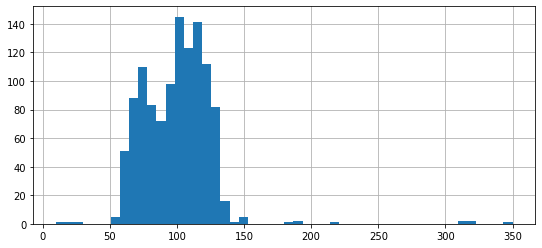

In [126]:
plt.hist(weights, bins = 50)
plt.show()

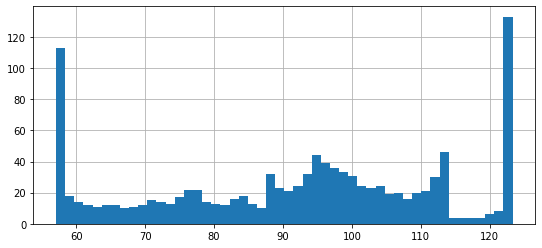

In [127]:
plt.hist(actual, bins = 50)
plt.show()

In [128]:
actual =  discretize(actual,outlier = False,trunc = True)
weights = discretize(weights,outlier = True,trunc = True)

50.8153219057107
132.95108692100683
47.0997417354169
152.43697194977938


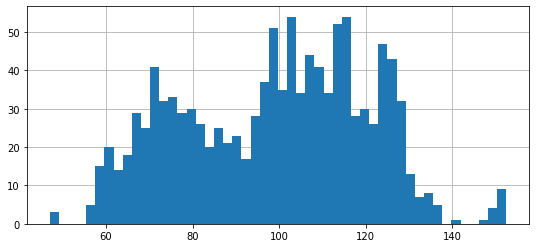

In [129]:
plt.hist(weights, bins = 50)
plt.show()

In [130]:
print(weights)

[122.3, 122.9, 123.4, 124.6, 122.0, 125.0, 124.8, 128.9, 123.8, 123.6, 124.8, 126.9, 123.5, 126.0, 126.4, 123.4, 127.2, 122.1, 126.0, 122.5, 125.7, 125.6, 123.9, 124.2, 125.9, 126.1, 122.1, 128.7, 127.3, 126.7, 126.4, 128.4, 128.0, 127.3, 123.2, 124.8, 125.0, 125.9, 124.0, 124.7, 125.0, 122.2, 128.2, 128.6, 128.2, 125.0, 127.4, 124.3, 126.6, 122.6, 124.0, 128.2, 125.2, 128.8, 127.0, 126.1, 127.0, 123.4, 127.9, 126.0, 124.2, 122.9, 128.4, 122.2, 123.1, 126.3, 128.1, 127.4, 128.5, 128.8, 125.9, 126.1, 123.4, 126.0, 127.8, 126.0, 124.3, 128.3, 127.4, 126.9, 122.3, 128.6, 122.5, 127.4, 122.5, 123.8, 125.6, 122.7, 126.9, 127.1, 126.1, 126.6, 127.7, 123.3, 124.5, 123.9, 123.4, 124.8, 123.0, 133.6, 130.1, 127.3, 135.8, 137.4, 129.7, 130.9, 123.1, 135.3, 125.1, 125.9, 137.2, 135.0, 123.9, 125.6, 128.3, 130.8, 136.7, 137.6, 126.9, 130.4, 134.7, 126.0, 131.0, 132.4, 134.9, 131.3, 125.1, 125.4, 132.0, 130.7, 135.5, 134.4, 125.1, 131.7, 129.6, 132.7, 133.1, 121.9, 132.3, 128.3, 130.5, 123.7, 126.7

In [132]:
[max_val, min_val] = max_min(weights)
print(max_val, min_val)

152.4 47.0


## Bayesian Filtering Algorithm

In [133]:
def lh_hallway(hall, z, z_prob):
    """ compute likelihood that a measurement matches
    positions in the hallway."""
    
    try:
        scale = z_prob / (1. - z_prob)
    except ZeroDivisionError:
        scale = 1e8

    likelihood = np.ones(len(hall))
    likelihood[hall==z] *= scale
    return likelihood

In [134]:
# According to the sensor data on the
# "door" or "hall" presence we change the likelihoods for different positions.

def scaled_update(hall, belief, z, z_prob):
    likelihood = lh_hallway(hall, z, z_prob)
    return normalize(likelihood * belief)

In [135]:
# According to the movement sensor data we change the
# likelihoods for different positions.

def predict_move_convolution(pdf, offset, kernel):
    N = len(pdf)
    kN = len(kernel)
    width = int((kN - 1) / 2)

    prior = np.zeros(N)
    for i in range(N):
        for k in range (kN):
            index = (i + (width-k) - offset) % N
            prior[i] += pdf[index] * kernel[k]
    return prior

In [ ]:
## Major Hyper parameters to be taken for Bayesian Filtering
## Likelihood Updation -> Taking 75% for being -1 to +1 from the detected position by sensor
## Convolution Creation for prior updation  -> 
## Taking mountain function for having probabilities from reverse motion to double the motion expected

In [136]:
def make_hallway(weight):
    hallway = np.array([0] * length)
    step = int((weight-min_val)*exponent)
    fr = 0
    to = length - 1
    if step >= exponent:
        fr = int(step - exponent)
    if step < length-exponent:
        to = int(step + exponent)
    for i in range(fr, to+1):
        hallway[i] = 1
    return hallway

In [137]:
def make_kernel(weight1, weight2):
    width = abs(int((weight2-weight1)*exponent))
    if width == 0:
        return [1]
    kernel = np.array([0] * 2 * width, dtype = float)
    cur = 0
    step = 1
    for i in range(len(kernel)):
        if cur < 0:
            cur = 0
        kernel[i] = abs(cur)
        if i < width:
            cur = cur + step
            step = step + 10
        else:
            cur = cur - step
            step = step - 10
#         print(cur)
    list_normalize(kernel)
#     print(kernel)
    return kernel

In [138]:
length = int((max_val-min_val)*exponent)
print(length)
prob = 1/length
prior = np.array([prob] * length)

1054


In [139]:
path = []
for i in range(len(weights)):
    ## likelihood updation
#     print(weights[i])
    hallway = make_hallway(weights[i])
    likelihood = lh_hallway(hallway, z=1, z_prob=.75)
    posterior = update(likelihood, prior)
    
#     if i%100 == 0:
#         book_plots.plot_prior_vs_posterior(prior, posterior, ylim=(0,.5))
       
    ## convolution step
    kernel = (.1, .8, .1)
#     if i != len(weights) - 1:
#         kernel = make_kernel(weights[i], weights[i+1])
    prior = predict(posterior, 1, kernel)
    
#     if i%100 == 0:
#         book_plots.plot_prior_vs_posterior(prior, posterior, True, ylim=(0,.5))
    
    step = np.argmax(prior)+1
    point = (step/exponent + min_val)
    path.insert(len(path), point)

print(path)

[121.6, 122.2, 122.7, 123.8, 123.1, 124.2, 124.4, 124.5, 124.6, 124.7, 124.8, 124.9, 124.7, 125.2, 125.3, 125.4, 125.5, 125.6, 125.7, 125.8, 125.9, 126.0, 126.1, 125.2, 125.3, 125.4, 125.5, 125.6, 126.7, 126.8, 126.9, 127.0, 127.2, 127.3, 127.5, 127.6, 127.7, 127.8, 127.9, 128.0, 128.1, 128.2, 128.3, 128.4, 128.5, 128.6, 128.6, 128.7, 128.8, 128.9, 128.9, 129.0, 129.1, 129.2, 129.3, 129.4, 129.5, 129.6, 129.7, 129.8, 129.9, 130.0, 129.5, 129.6, 129.7, 129.8, 129.3, 129.4, 129.5, 129.6, 129.7, 129.8, 129.9, 130.0, 130.1, 130.2, 130.3, 129.2, 129.3, 129.4, 129.5, 129.6, 129.7, 129.8, 129.9, 129.9, 130.0, 130.1, 130.2, 130.3, 130.4, 130.5, 130.6, 130.7, 130.8, 130.9, 131.0, 131.1, 131.2, 131.3, 131.3, 131.4, 131.4, 131.5, 131.6, 131.7, 131.8, 131.9, 132.0, 132.1, 132.2, 132.3, 132.4, 132.5, 132.6, 132.7, 132.8, 132.9, 133.0, 133.1, 133.2, 133.3, 131.9, 132.0, 132.1, 132.2, 132.3, 132.4, 132.5, 132.6, 132.7, 132.8, 132.9, 132.8, 132.9, 133.0, 133.1, 133.2, 133.3, 133.4, 133.5, 133.6, 133.7

In [131]:
print(actual)

[122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.3, 122.3, 122.3, 122.3, 122.3, 122.3, 122.4, 122.4, 122.4, 122.4, 122.5, 122.5, 122.5, 122.5, 122.6, 122.6, 122.6, 122.7, 122.7, 122.7, 122.8, 122.8, 122.8, 122.9, 122.9, 122.9, 123.0, 123.0, 123.0, 123.1, 123.1, 123.1, 123.1, 123.1, 123.2, 123.2, 123.2, 123.2, 123.2, 123.3, 123.3, 123.3, 123.3, 123.2, 123.2, 123.2, 123.1, 123.1, 123.1, 123.0, 122.8, 122.8, 122.6, 122.5, 122.4, 122.2, 122.1, 121.9, 121.8, 121.6, 121.4, 121.3, 121.1, 121.0, 120.8, 120.5, 120.3

[0.7, 0.0, 0.4, 1.5, 0.7, 1.9, 2.1, 2.2, 2.2, 2.4, 2.5, 2.6, 2.4, 2.9, 3.0, 3.1, 3.2, 3.2, 3.4, 3.5, 3.6, 3.7, 3.7, 2.9, 3.0, 3.1, 3.2, 3.2, 4.4, 4.5, 4.6, 4.7, 5.0, 5.0, 5.2, 5.3, 5.5, 5.5, 5.7, 5.7, 5.8, 5.9, 6.1, 6.2, 6.2, 6.3, 6.3, 6.4, 6.6, 6.7, 6.7, 6.7, 6.8, 6.9, 7.1, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.2, 7.3, 7.4, 7.6, 7.1, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.8, 7.9, 8.0, 6.8, 7.0, 7.1, 7.2, 7.2, 7.2, 7.4, 7.5, 7.5, 7.5, 7.5, 7.6, 7.8, 7.8, 7.9, 8.0, 7.9, 8.1, 8.2, 8.2, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.5, 8.5, 8.5, 8.7, 8.8, 8.9, 9.0, 8.9, 9.1, 9.2, 9.2, 9.3, 9.3, 9.5, 9.6, 9.7, 9.8, 9.9, 10.1, 8.8, 8.9, 9.0, 9.1, 9.5, 9.6, 9.9, 10.0, 10.2, 10.6, 10.8, 10.9, 11.1, 11.4, 11.6, 11.8, 12.2, 12.4, 12.7, 13.0, 13.3, 13.5, 13.6, 13.9, 14.5, 14.8, 15.2, 15.7, 16.1, 16.7, 17.1, 17.4, 17.9, 18.5, 19.0, 19.3, 19.7, 20.1, 20.5, 21.0, 21.3, 21.7, 22.2, 22.5, 22.9, 23.1, 23.4, 23.8, 24.1, 24.5, 24.7, 25.0, 25.4, 25.7, 26.2, 26.5, 26.9, 27.3, 27.6, 28.0, 28.3, 28.5, 28.7, 29.2, 29.5, 29.8,

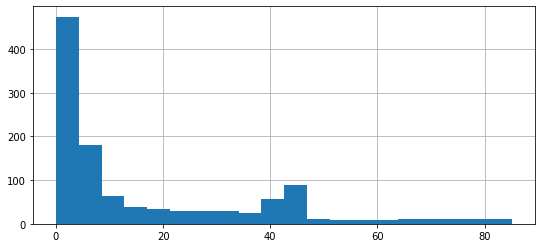

In [142]:
diffs = []
for i in range(len(path)):
    k = abs(path[i]-actual[i])
    k = truncate(k, precision)
    diffs.insert(len(diffs),k)
print(diffs)
plt.hist(diffs, bins = 20)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1145,) and (1144,)

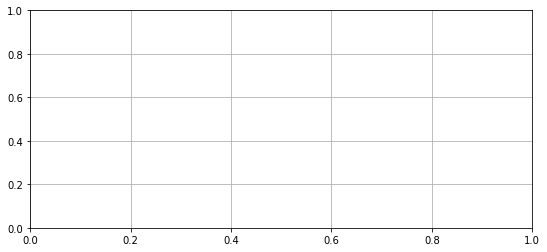

In [113]:
gh.plot_gh_results_manual(weights, path, path, actual)

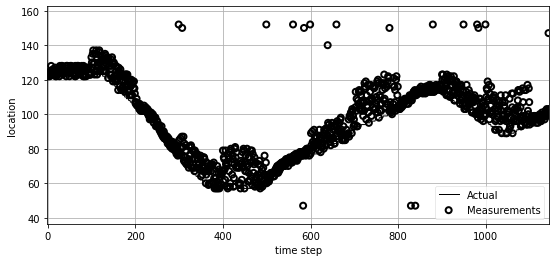

In [114]:
gh.plot_gh_results_manual1(weights, path, path, actual)

ValueError: x and y must have same first dimension, but have shapes (1145,) and (1144,)

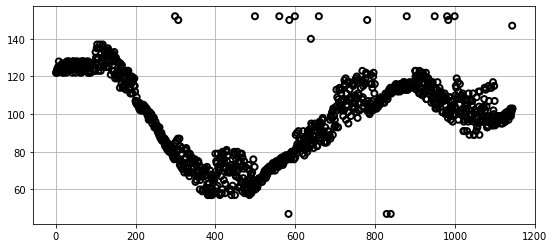

In [115]:
gh.plot_gh_results_manual2(weights, path, path, actual)